<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Ago25-26/Tarea_25_de_agosto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
#Funciónes de costo total para un modelo de validado, vector wn junto a costo total para el modelo de entrenamiento y evaluar el polinomio.

import numpy as np
import matplotlib.pyplot as plt
from numpy import random

def wn(x,t,n):
  #Vector w -coeficientes del polinomio-
  pol=np.zeros((n,len(x))) #Creo un arreglo bidimensional de tamaño n X Longitud de x, todo acomodar en n columnas los datos de x**n
  for i in range (1,n+1):
    pol[i-1]=x**i #Por fila del arreglo bidimensional le asigno el arreglo x**n
  X=np.vstack((np.ones_like(x),pol)).T #Definimos a la matriz X con una columa de unicamente 1 y luego xi, y x1^2. El orden va ascediendo en potencias de x; x^o->x^1->x^2->...->x^n
  w=(np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,t))) #np.linalg.inv es para invertir una matriz, np.matmul es para multiplicar matrices

  #Costo total:
  ct=costo_total(w,X,t) #Calcular el costo total
  return w,ct #Regresar vector w y costo total

def costo_total(w,x,t):
  sum=np.matmul((t-np.matmul(x,w)).T,t-np.matmul(x,w))
  return sum/len(t) #regresar costo total



def pol(puntos,coefs): #Evaluar el polinomio obtenido con el método de mínimos cuadrados
  sum=0
  var_dep=np.zeros(len(puntos)) #Arreglo del resultado obtenido por el polinomio
  for j in range (0,len(puntos)):
    sum=0; #Fijo el valor del predictor (puntos) para evaluar el polinomio
    for i in range (0,len(coefs)):
      sum+=coefs[i]*(puntos[j])**i #Evaluar el polinomio; con el valor del predictor ya fijado y ciclando sobre los coeficientes por el predictor a la potencia i
    var_dep[j]=sum;
  return var_dep #regresar el arreglo de los puntos evaluados en el polinomio

data=np.loadtxt("olympic100m_men.txt",delimiter=",").T #Delimitados por coma ya que es archivo separado por comas, .T indica la transpuesta

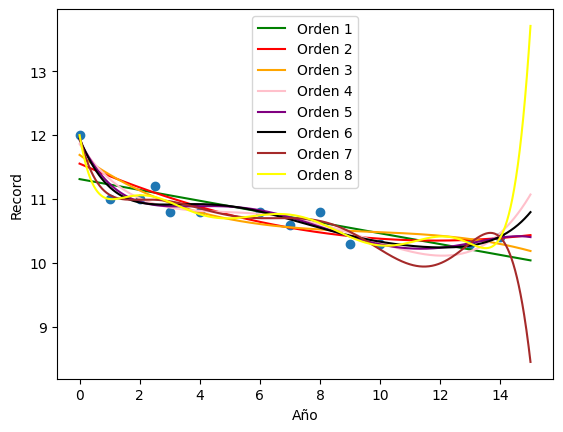

In [231]:
#Gráficas del conjunto de entrenamiento y cálculo del costo total

#Conjunto de entrenamiento
x=data[0][0:13]#De data, el primer arreglo es de años
y=data[1][0:13] #De data, el segundo arreglo es de los records

x=(x-1896)/4 #Normalizar x. Para el otro conjunto x-1950

B=np.linspace(0,15,1000) #elementos para graficar
plt.scatter(x,y) #Gráfica de puntos

A1,C1=wn(x,y,1)
reg1=pol(B,A1)
plt.plot(B,reg1,color="green",label="Orden 1")

A2,C2=wn(x,y,2)
reg2=pol(B,A2)
plt.plot(B,reg2,color="red",label="Orden 2")

A3,C3=wn(x,y,3)
reg3=pol(B,A3)
plt.plot(B,reg3,color="orange",label="Orden 3")

A4,C4=wn(x,y,4)
reg4=pol(B,A4)
plt.plot(B,reg4,color="pink",label="Orden 4")

A5,C5=wn(x,y,5)
reg5=pol(B,A5)
plt.plot(B,reg5,color="purple",label="Orden 5")

A6,C6=wn(x,y,6)
reg6=pol(B,A6)
plt.plot(B,reg6,color="black",label="Orden 6")

A7,C7=wn(x,y,7)
reg7=pol(B,A7)
plt.plot(B,reg7,color="brown",label="Orden 7")

A8,C8=wn(x,y,8)
reg8=pol(B,A8)
plt.plot(B,reg8,color="yellow",label="Orden 8")

plt.xlabel("Año")
plt.ylabel("Record")

plt.legend()
plt.show()

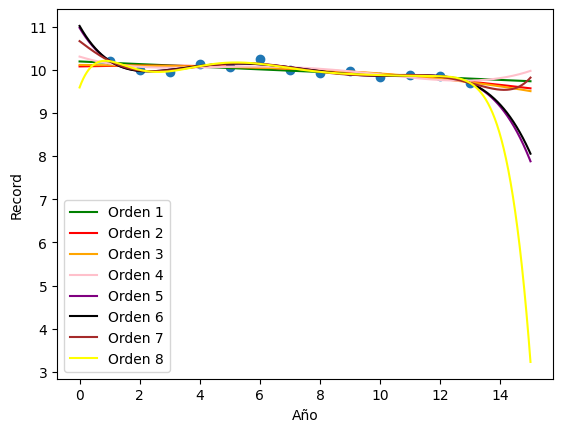

In [232]:
#Conjunto de validación: Gráfica y cálculo del costo total

#Graficas
xv=data[0][14:27]
yv=data[1][14:27]

xv=(xv-1956)/4

plt.scatter(xv,yv) #Gráfica de puntos

AV1,CV1=wn(xv,yv,1)
regv1=pol(B,AV1)
plt.plot(B,regv1,color="green",label="Orden 1")

AV2,CV2=wn(xv,yv,2)
regv2=pol(B,AV2)
plt.plot(B,regv2,color="red",label="Orden 2")

AV3,CV3=wn(xv,yv,3)
regv3=pol(B,AV3)
plt.plot(B,regv3,color="orange",label="Orden 3")

AV4,CV4=wn(xv,yv,4)
regv4=pol(B,AV4)
plt.plot(B,regv4,color="pink",label="Orden 4")

AV5,CV5=wn(xv,yv,5)
regv5=pol(B,AV5)
plt.plot(B,regv5,color="purple",label="Orden 5")

AV6,CV6=wn(xv,yv,6)
regv6=pol(B,AV6)
plt.plot(B,regv6,color="black",label="Orden 6")

AV7,CV7=wn(xv,yv,7)
regv7=pol(B,AV7)
plt.plot(B,regv7,color="brown",label="Orden 7")

AV8,CV8=wn(xv,yv,8)
regv8=pol(B,AV8)
plt.plot(B,regv8,color="yellow",label="Orden 8")

plt.xlabel("Año")
plt.ylabel("Record")

plt.legend()
plt.show()

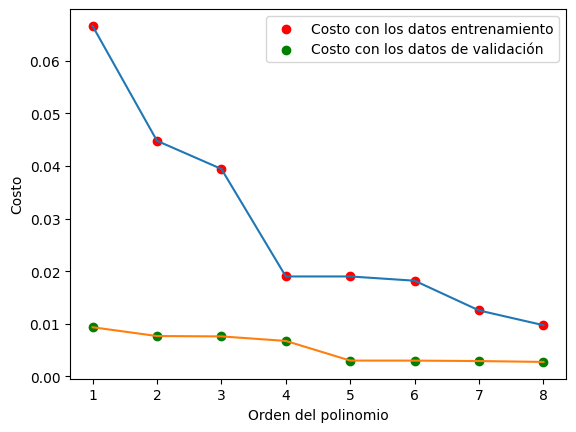

In [233]:
#Gráficas Costo total vs orden del polinomio para el conjunto de enfrentamiento y el de validación

#Costo entrenamiento
cx=np.array([C1,C2,C3,C5,C5,C6,C7,C8])
ny=np.linspace(1,8,8)
plt.scatter(ny,cx,color="red",label="Costo con los datos entrenamiento")
plt.plot(ny,cx)

#Costo validación
cvx=np.array([CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8])
plt.scatter(ny,cvx,color="green",label="Costo con los datos de validación")
plt.plot(ny,cvx)

plt.xlabel("Orden del polinomio")
plt.ylabel("Costo")
plt.legend()
plt.show()

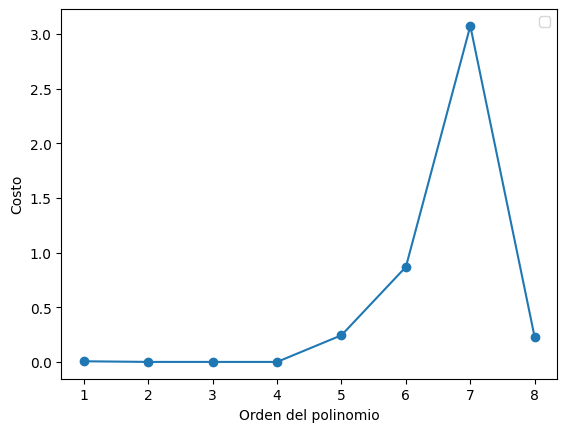

In [294]:
#Cross validation: Calculo de k y gráfica

def LCV(x,t,n):
  sum=0
  for i in range(0,len(x)):
    aux1=np.delete(x,i)
    aux2=np.delete(t,i)
    aux,cl=wn(aux1,aux2,n) #Entreno excluyendo la observacion i en polinomio de grado n. Sólo me interesa cl -el costo total-
    sum+=cl
    return sum/len(x)

cl=np.zeros(8)

for i in range(0,8):
  cl[i]=LCV(data[0],data[1],i)

plt.scatter(ny,cl)
plt.plot(ny,cl)
plt.xlabel("Orden del polinomio")
plt.ylabel("Costo")
plt.legend()
plt.show()